# 1. OCR 테스트

In [ ]:
import os
 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/text'
file_list = os.listdir(img_dir)
file_list

['hand_002.png',
 'hand_005.png',
 'print_004.png',
 'hand_001.png',
 'hand_004.png',
 'print_003.png',
 'print_001.png',
 'hand_003.png',
 'print_002.png',
 'print_005.png']

## 1.1. keras-ocr

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [ ]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

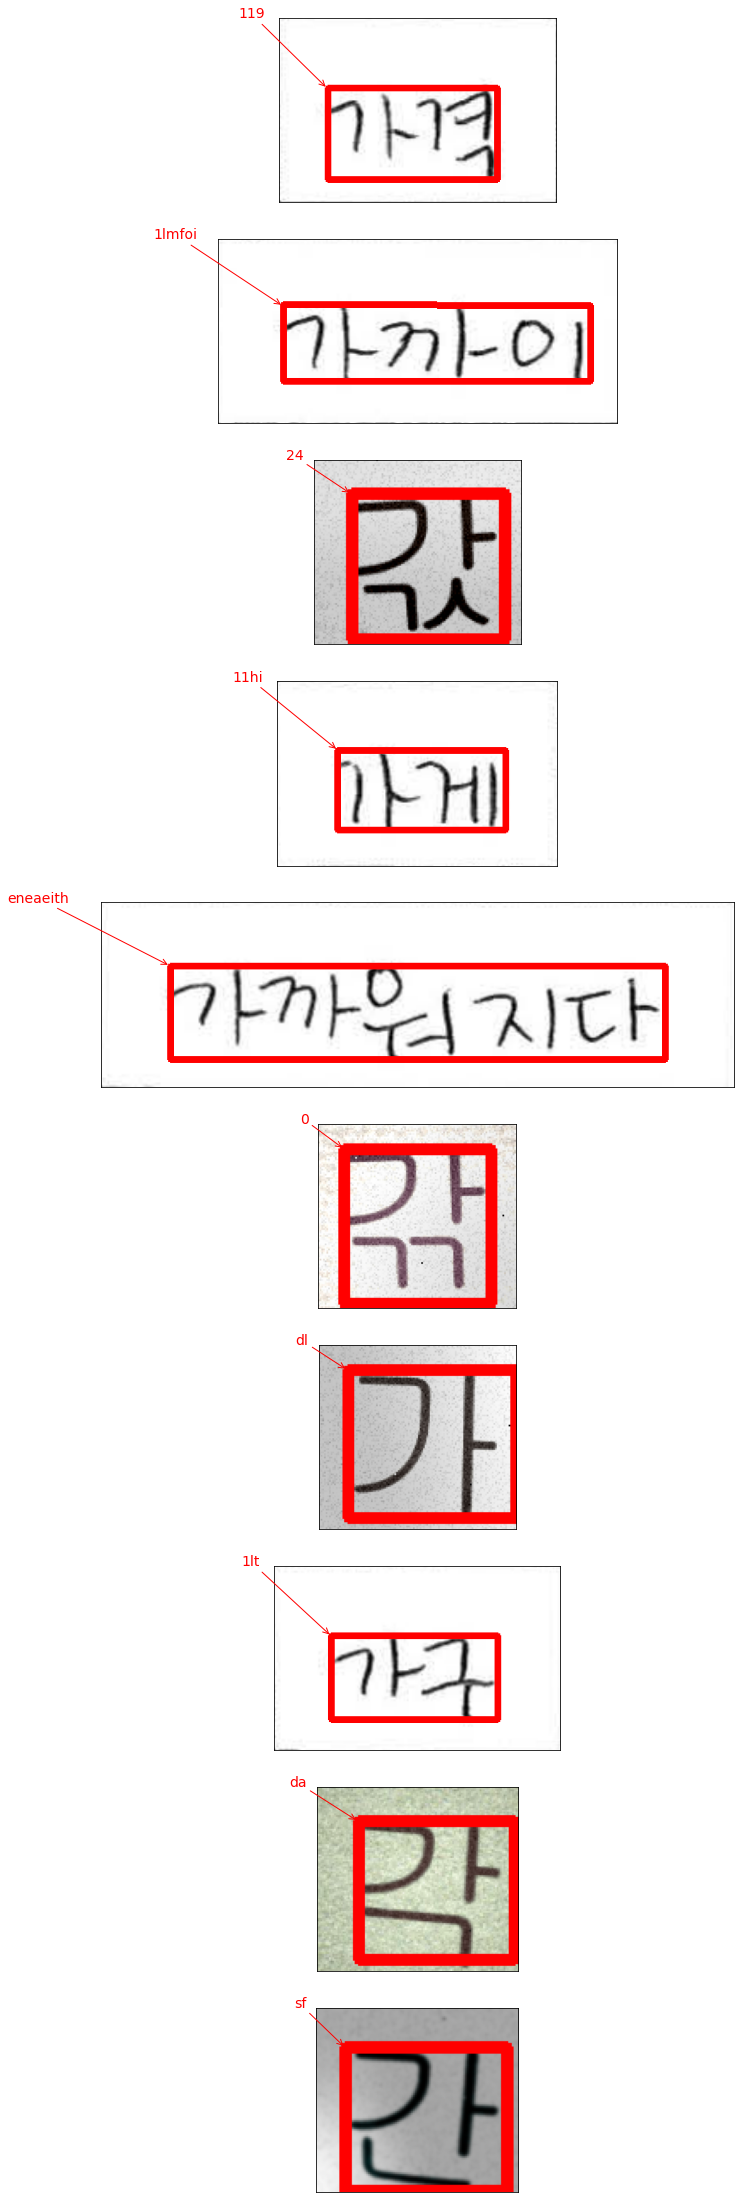

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 1.2. Tesseract

In [ ]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [ ]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[hand_002.png]
4-1

A

Done
[hand_005.png]
“TL OO}

Done
[print_004.png]
at

Done
[hand_001.png]
y-HI

Done
[hand_004.png]
TEA

—

oh}

TH

Done
[print_003.png]
at

Done
[print_001.png]
Jt

Done
[hand_003.png]
ZZ

Done
[print_002.png]
oF

Done
[print_005.png]
J}

Done


# 3. 테스트 결과 분석

In [ ]:
def compare_ocr(file):
    print('[keras-ocr]')
    idx = file_list.index(file)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('\n[Tesseract]')
    recognize_images(os.path.join(img_dir, file), save_dir)

## 3.1. 텍스트 위주의 심플한 표지
- 세 가지 방법 모두 텍스트를 대체적으로 잘 인식했다.
- Google OCR은 제목과 저자를 정확하게 인식했고, keras-ocr과 Tesseract는 저자명 "J·R·R·TOLKIEN"을 정확하게 인식하지 못했다.

[keras-ocr]


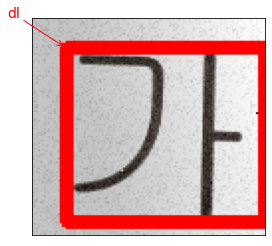


[Tesseract]
Jt

Done


In [ ]:
compare_ocr('print_001.png')

## 3.2. 이미지와 겹쳐진 텍스트
- Google OCR은 거의 정확하게 인식했고, keras-ocr은 일부 단어를 부정확하게 인식했다.
- Tesseract는 아래 두 이미지 모두 텍스트를 인식하지 못했다.

[keras-ocr]


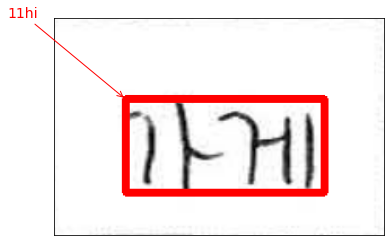


[Tesseract]
y-HI

Done


In [ ]:
compare_ocr('hand_001.png')

[keras-ocr]


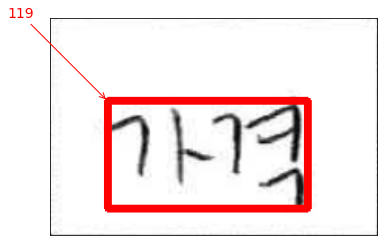


[Tesseract]
4-1

A

Done


In [ ]:
compare_ocr('hand_002.png')

# 4. 결론
- 다양한 텍스트 이미지를 대상으로 OCR 테스트를 진행한 결과 거의 인식 되지 않았다 / 다양하게 찾아보니 Keras-ocr,Tesseract 등의 모델은 텍스트 인식이 잘 되지 않고 구글 API가 성늘이 훨씬 좋은점을 찾았으나 새로 계정을 파야 하기 때문에 구글 API는 사용하지 못했다.